In [0]:
%tensorflow_version 1.x 

#Suppress warnings which keep poping up
import warnings
warnings.filterwarnings("ignore")

from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D, SeparableConvolution2D
from keras.layers import Activation, Flatten, Dense, Dropout, AveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 6s 0us/step


In [0]:
print(train_features.shape)

(50000, 32, 32, 3)


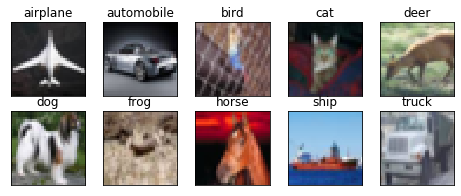

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)       

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             rotation_range=15,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=True)

# datagen = ImageDataGenerator(zoom_range=0.0, 
#                              horizontal_flip=False)


In [0]:
# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/50







ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-11-f79ce267e66d>", line 5, in <module>
    validation_data = (test_features, test_labels), verbose=1)
  File "/usr/local/lib/python3.6/dist-packages/keras/legacy/interfaces.py", line 91, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/keras/engine/training.py", line 1658, in fit_generator
    initial_epoch=initial_epoch)
  File "/usr/local/lib/python3.6/dist-packages/keras/engine/training_generator.py", line 215, in fit_generator
    class_weight=class_weight)
  File "/usr/local/lib/python3.6/dist-packages/keras/engine/training.py", line 1449, in train_on_batch
    outputs = self.train_function(ins)
  File "/usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py", line 2979, in __call__
    return self._call(inp

KeyboardInterrupt: ignored

In [0]:
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  lrate = 0.001
  # if epoch > 15:
  #   lrate = 0.0003
  if epoch > 35:
    lrate = 0.0005
  if epoch > 60:
    lrate = 0.0003
  if epoch > 100:
    lrate = 0.0001

  return lrate
  # return round(0.003 * 1/(1 + 0.319 * epoch), 10)

In [0]:
# Define the model
my_model = Sequential()

my_model.add(SeparableConvolution2D(64, 3, 3, border_mode='same', input_shape=(32, 32, 3), activation='relu', use_bias=False)) # 32*32*64, rf: 3
my_model.add(BatchNormalization())
my_model.add(Dropout(0.1))

my_model.add(SeparableConvolution2D(64, 3, 3, border_mode='valid', activation='relu', use_bias=False)) # 30*30*64, rf: 5
my_model.add(BatchNormalization())
my_model.add(Dropout(0.1))

my_model.add(MaxPooling2D(pool_size=(2, 2))) # 15*15*64, rf: 9
my_model.add(Dropout(0.1))

my_model.add(SeparableConvolution2D(128, 3, 3, border_mode='same', activation='relu', use_bias=False)) # 15*15*128, rf: 13
my_model.add(BatchNormalization())
my_model.add(Dropout(0.1))

my_model.add(SeparableConvolution2D(128, 3, 3, border_mode='valid', activation='relu', use_bias=False)) # 13*13*128 rf: 17
my_model.add(BatchNormalization())
my_model.add(Dropout(0.1))

my_model.add(MaxPooling2D(pool_size=(2, 2))) # 6*6*128 rf: 25
my_model.add(Dropout(0.1))

my_model.add(SeparableConvolution2D(128, 3, 3, border_mode='same', activation='relu', use_bias=False)) # 6*6*128 rf: 33
my_model.add(BatchNormalization())
my_model.add(Dropout(0.1))

my_model.add(SeparableConvolution2D(128, 3, 3, border_mode='valid', activation='relu', use_bias=False)) # 4*4*128 rf: 41
my_model.add(BatchNormalization())
my_model.add(Dropout(0.1))

my_model.add(AveragePooling2D()) # 2*2*128 rf: ? 
my_model.add(Flatten()) # 512, rf: ?

my_model.add(Dense(num_classes, activation='softmax'))

# Compile the model
my_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [0]:
my_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_7 (Separabl (None, 32, 32, 64)        219       
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_14 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
separable_conv2d_8 (Separabl (None, 30, 30, 64)        4672      
_________________________________________________________________
batch_normalization_8 (Batch (None, 30, 30, 64)        256       
_________________________________________________________________
dropout_15 (Dropout)         (None, 30, 30, 64)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 64)       

Epoch 1/150

Epoch 00001: LearningRateScheduler setting learning rate to 0.001.
781/781 [==============================] - 31s 39ms/step - loss: 1.5397 - acc: 0.4439 - val_loss: 1.1649 - val_acc: 0.5875
Epoch 2/150

Epoch 00002: LearningRateScheduler setting learning rate to 0.001.
781/781 [==============================] - 29s 37ms/step - loss: 1.2051 - acc: 0.5704 - val_loss: 1.1017 - val_acc: 0.6223
Epoch 3/150

Epoch 00003: LearningRateScheduler setting learning rate to 0.001.
781/781 [==============================] - 28s 36ms/step - loss: 1.0755 - acc: 0.6225 - val_loss: 1.0446 - val_acc: 0.6490
Epoch 4/150

Epoch 00004: LearningRateScheduler setting learning rate to 0.001.
781/781 [==============================] - 29s 37ms/step - loss: 0.9800 - acc: 0.6544 - val_loss: 0.8223 - val_acc: 0.7200
Epoch 5/150

Epoch 00005: LearningRateScheduler setting learning rate to 0.001.
781/781 [==============================] - 29s 37ms/step - loss: 0.9233 - acc: 0.6744 - val_loss: 0.9122 - v

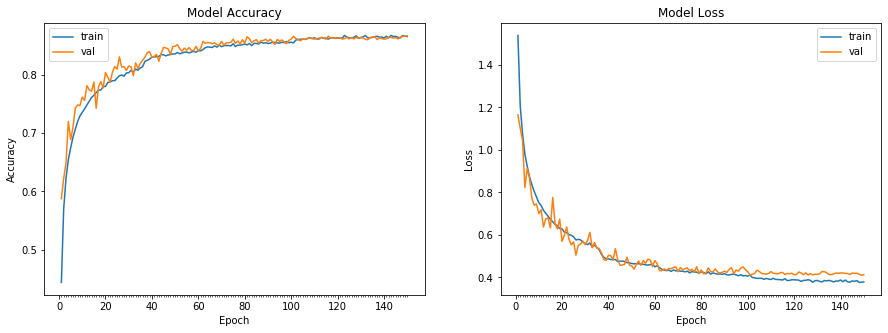

Accuracy on test data is: 86.68


In [0]:
# train the model
my_start = time.time()
# Train the model
my_model_info = my_model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 64),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 150,
                                 callbacks=[LearningRateScheduler(scheduler,verbose=1)], 
                                 validation_data = (test_features, test_labels), verbose=1)
my_end = time.time()
print ("Model took %0.2f seconds to train"%(my_end - my_start))
# plot model history
plot_model_history(my_model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, my_model))